In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import spatial
import networkx as nx
from scipy import spatial
from sklearn.cluster import KMeans

# Install dependencies

In [114]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [115]:
pip install haversine

Note: you may need to restart the kernel to use updated packages.


# Import dataframe

In [116]:
df = pd.read_csv("dataset_parc.csv")

In [117]:
df.columns =['latitude', 'longitude', 'delete', 'altitude', 'date', 'dateString', 'timeString', 'userID', 'dateTime' ]

In [118]:
df.head()

,latitude,longitude,delete,altitude,date,dateString,timeString,userID,dateTime
0,48.849673,2.246173,0,492.0,39861.00090,11/02/2022,00:01:18,842,11/02/2022 21:12:09
1,48.865447,2.247527,0,363.0,39861.01352,11/02/2022,00:19:28,694,11/02/2022 21:12:09
2,48.853059,2.250678,0,-777.0,39861.01455,11/02/2022,00:20:57,37,11/02/2022 21:12:09
3,48.868243,2.253649,0,-333.0,39861.01515,11/02/2022,00:21:49,300,11/02/2022 21:12:10
4,48.856470,2.249226,0,-264.0,39861.01649,11/02/2022,00:23:45,877,11/02/2022 21:12:10


In [157]:
df.describe()

,latitude,longitude,delete,altitude,date,userID,minute
count,17102.000000,17102.000000,17102.0,17102.000000,1.710200e+04,17102.000000,17102.000000
mean,48.861516,2.250551,0.0,177.817086,1.667425e+09,500.294410,260.656239
std,0.007253,0.002986,0.0,91.961955,9.920766e+02,289.859434,3.319735
min,48.849088,2.245395,0.0,-777.000000,1.667424e+09,0.000000,255.000000
25%,48.855209,2.247944,0.0,133.000000,1.667424e+09,251.000000,258.000000
50%,48.861395,2.250554,0.0,165.000000,1.667425e+09,503.000000,261.000000
75%,48.867779,2.253154,0.0,196.900000,1.667426e+09,752.000000,264.000000
max,48.874143,2.255758,0.0,1136.000000,1.667427e+09,999.000000,266.000000


In [260]:
height = df.longitude.max() - df.longitude.min()
width = df.latitude.max() - df.latitude.min()
ratio = width/height
print(height, width, ratio)

0.010363298103839735 0.02505449128843651 2.417617541963161


In [119]:
BBox = ((df.longitude.min(),   df.longitude.max(),  df.latitude.min(), df.latitude.max()))

In [120]:
points = (BBox[1], BBox[2], BBox[0], BBox[3])
points

(2.2557583965942998, 48.84908806914967, 2.24539509849046, 48.87414256043811)

In [121]:
df.duplicated().value_counts()


False    17102
dtype: int64

In [122]:
df.describe()

,latitude,longitude,delete,altitude,date,userID
count,17102.000000,17102.000000,17102.0,17102.000000,17102.000000,17102.000000
mean,48.861516,2.250551,0.0,177.817086,39861.285019,500.294410
std,0.007253,0.002986,0.0,91.961955,0.167506,289.859434
min,48.849088,2.245395,0.0,-777.000000,39861.000900,0.000000
25%,48.855209,2.247944,0.0,133.000000,39861.126113,251.000000
50%,48.861395,2.250554,0.0,165.000000,39861.282475,503.000000
75%,48.867779,2.253154,0.0,196.900000,39861.416927,752.000000
max,48.874143,2.255758,0.0,1136.000000,39861.633030,999.000000


In [123]:
df.isnull().sum()


latitude      0
longitude     0
delete        0
altitude      0
date          0
dateString    0
timeString    0
userID        0
dateTime      0
dtype: int64

In [124]:
df['dateTime'] = pd.to_datetime(df['dateTime'])
df.info()
df['date'] = pd.to_datetime(df['dateTime']).map(pd.Timestamp.timestamp)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17102 entries, 0 to 17101
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   latitude    17102 non-null  float64       
 1   longitude   17102 non-null  float64       
 2   delete      17102 non-null  int64         
 3   altitude    17102 non-null  float64       
 4   date        17102 non-null  float64       
 5   dateString  17102 non-null  object        
 6   timeString  17102 non-null  object        
 7   userID      17102 non-null  int64         
 8   dateTime    17102 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 1.2+ MB


In [125]:
df.dtypes

latitude             float64
longitude            float64
delete                 int64
altitude             float64
date                 float64
dateString            object
timeString            object
userID                 int64
dateTime      datetime64[ns]
dtype: object

# Group users who were close to each other within a 5 min duration

In [126]:
df["minute"] = df["dateTime"].apply(lambda x: (12*x.hour + ((x.minute//5) + 1)))

In [261]:
print(df['minute'].min())
print(df['minute'].max())


255
266


In [128]:
df2=pd.DataFrame(df.groupby(['minute','userID'])['dateTime'].max())
df2.reset_index(inplace=True)
df2.head()
df2.describe()

,minute,userID
count,9071.000000,9071.000000
mean,260.611068,499.527615
std,3.383302,289.037290
min,255.000000,0.000000
25%,258.000000,250.000000
50%,261.000000,499.000000
75%,264.000000,750.000000
max,266.000000,999.000000


In [129]:
df3=pd.merge(df2,df,left_on=['minute','userID','dateTime'],right_on=['minute','userID','dateTime'])
df3.head()


,minute,userID,dateTime,latitude,longitude,delete,altitude,date,dateString,timeString
0,255,0,2022-11-02 21:14:14,48.864960,2.255094,0,88.0,1.667424e+09,11/02/2022,11:03:56
1,255,2,2022-11-02 21:14:04,48.861675,2.255413,0,79.0,1.667424e+09,11/02/2022,11:02:48
2,255,3,2022-11-02 21:12:46,48.862654,2.245586,0,141.0,1.667424e+09,11/02/2022,10:39:45
3,255,6,2022-11-02 21:14:26,48.856086,2.250619,0,113.0,1.667424e+09,11/02/2022,11:05:20
4,255,7,2022-11-02 21:14:23,48.873783,2.251938,0,99.0,1.667424e+09,11/02/2022,11:04:43


In [130]:
from haversine import haversine, Unit

distance_array = set()

for i in range(255,267):
    temp=[]
    for index, instance in df3[df3['minute'] == i].iterrows():
        for index1, instance1 in df3[df3['minute'] == i].iterrows():
#             print(i, index, index1)
            if index != index1:
                user1_coordinates = (instance['latitude'],instance['longitude'])
                user2_coordinates = (instance1['latitude'],instance1['longitude'])
                distance = haversine(user1_coordinates, user2_coordinates, unit='m')
                if distance<= 5:
                    if (instance1['userID'],instance['userID'], i, distance) not in distance_array and (instance['userID'],instance1['userID'], i, distance) not in distance_array:
                        distance_array.add((instance['userID'],instance1['userID'], i, distance))

In [131]:
distance_array = list(map(list, distance_array))

In [132]:
df3["latitude"].mean()

48.86147702233214

In [133]:
len(distance_array)

131

In [134]:
distance_df = pd.DataFrame(np.array(distance_array),
                   columns=['user1', 'user2', 'minute', 'distance'])

## Network visualisation

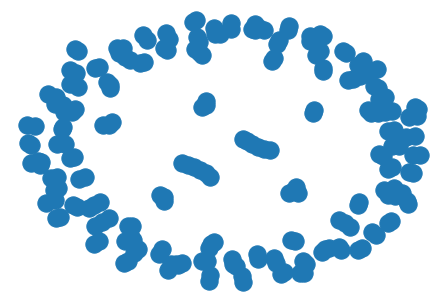

In [135]:
G = nx.from_pandas_edgelist(distance_df, source='user1', target='user2', edge_attr='distance')
nx.draw(G)

In [136]:
df3.longitude.mean()


2.2505396111464147

In [137]:
df3

,minute,userID,dateTime,latitude,longitude,delete,altitude,date,dateString,timeString
0,255,0,2022-11-02 21:14:14,48.864960,2.255094,0,88.0,1.667424e+09,11/02/2022,11:03:56
1,255,2,2022-11-02 21:14:04,48.861675,2.255413,0,79.0,1.667424e+09,11/02/2022,11:02:48
2,255,3,2022-11-02 21:12:46,48.862654,2.245586,0,141.0,1.667424e+09,11/02/2022,10:39:45
3,255,6,2022-11-02 21:14:26,48.856086,2.250619,0,113.0,1.667424e+09,11/02/2022,11:05:20
4,255,7,2022-11-02 21:14:23,48.873783,2.251938,0,99.0,1.667424e+09,11/02/2022,11:04:43
...,...,...,...,...,...,...,...,...,...,...
9079,266,994,2022-11-02 22:07:10,48.859164,2.249706,0,170.6,1.667427e+09,11/02/2022,09:42:22
9080,266,995,2022-11-02 22:08:51,48.850922,2.247537,0,131.2,1.667427e+09,11/02/2022,09:58:43
9081,266,996,2022-11-02 22:06:22,48.863559,2.251979,0,167.3,1.667427e+09,11/02/2022,08:13:45
9082,266,997,2022-11-02 22:08:37,48.865946,2.246843,0,131.2,1.667427e+09,11/02/2022,09:57:33


# Visualisation of location with time (frame duration: 5 mins)

In [138]:
lat_long_list = []
for i in range(255,267):
    temp=[]
    for index, instance in df3[df3['minute'] == i].iterrows():
        temp.append([instance['latitude'],instance['longitude']])
    lat_long_list.append(temp)

In [262]:

import folium

from folium.plugins import HeatMapWithTime
from branca.element import Figure

fig7=Figure(width=850,height=550)
m7=folium.Map(location=[48.86147702233214, 2.2505396111464147],zoom_start=14)
fig7.add_child(m7)

In [263]:
HeatMapWithTime(lat_long_list,radius=5,auto_play=True,position='bottomright').add_to(m7)
m7

## Create a random age dataset

### Paris popuation by age

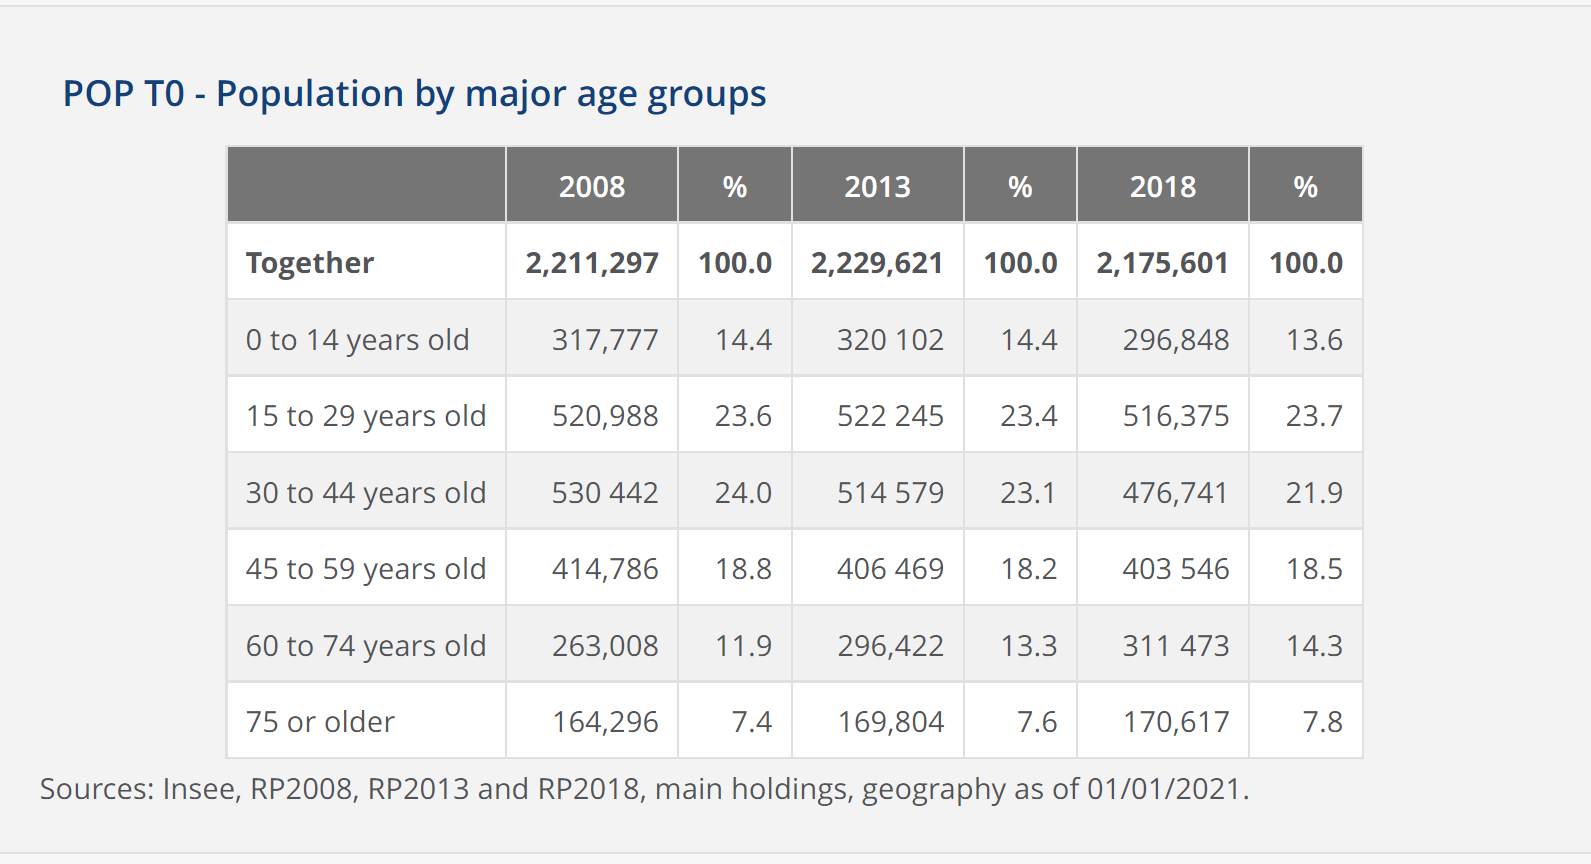

[Source: INSEE](https://www.insee.fr/fr/statistiques/2011101?geo=DEP-75)


### Calculating mean and standard deviation

In [150]:
age_dist = pd.DataFrame({"Age":["0-14", "15-29", "30-44", "45-49", "60-74", "75-100"], "Freq":[296848, 516375, 476741, 403546, 311473, 170617]})

In [151]:
age_dist[['Upper','Lower']]=age_dist['Age'].str.split('-',expand=True)
age_dist['Xi']=(age_dist['Upper'].astype(float)+age_dist['Lower'].astype(float))/2
age_dist.drop(['Upper','Lower'],axis=1,inplace=True)

In [152]:
age_dist.head()

,Age,Freq,Xi
0,0-14,296848,7.0
1,15-29,516375,22.0
2,30-44,476741,37.0
3,45-49,403546,47.0
4,60-74,311473,67.0


In [153]:
mu = np.average(age_dist['Xi'], weights=age_dist['Freq'])
print(mu)

39.45667562971134


In [154]:
sigma = np.sqrt(np.average((age_dist['Xi']-mean)**2,weights=age_dist['Freq']))
print(std)

22.750046501172722


In [195]:
samples = np.random.normal(mu, sigma, 17102)
samples = samples.astype(int)

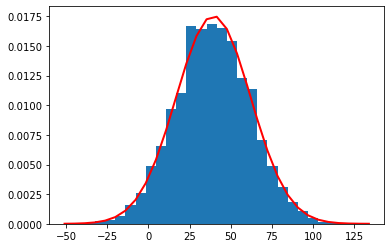

In [196]:
count, bins, ignored = plt.hist(samples, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

In [197]:
len(samples)

17102

In [198]:
# Creating a normally distributed age dataset

samples_df = pd.DataFrame(samples)
samples_df.columns = ["Age"]


In [199]:
samples_df.describe()

,Age
count,17102.000000
mean,39.146942
std,22.743778
min,-51.000000
25%,24.000000
50%,39.000000
75%,54.000000
max,134.000000


In [200]:
samples_df[samples_df["Age"] < 0].count()

Age    640
dtype: int64

In [201]:
samples_df[samples_df["Age"] < 0] = None

In [202]:
samples_df.head()

,Age
0,45.0
1,53.0
2,44.0
3,47.0
4,50.0


In [203]:
df_age = pd.concat([samples_df, df], axis=1).reindex(df.index)


In [204]:
df_age.tail(10)

,Age,latitude,longitude,delete,altitude,date,dateString,timeString,userID,dateTime,minute
17092,3.0,48.857492,2.250714,0,144.4,1.667427e+09,11/02/2022,10:02:03,272,2022-11-02 22:09:24,266
17093,65.0,48.855899,2.245535,0,144.4,1.667427e+09,11/02/2022,10:02:05,521,2022-11-02 22:09:25,266
17094,38.0,48.859715,2.246395,0,144.4,1.667427e+09,11/02/2022,10:02:06,183,2022-11-02 22:09:25,266
17095,NaN,48.863718,2.250049,0,144.4,1.667427e+09,11/02/2022,10:02:07,771,2022-11-02 22:09:25,266
17096,30.0,48.857532,2.251958,0,144.4,1.667427e+09,11/02/2022,10:02:08,840,2022-11-02 22:09:25,266
17097,15.0,48.870761,2.253017,0,147.6,1.667427e+09,11/02/2022,10:02:09,46,2022-11-02 22:09:25,266
17098,96.0,48.866473,2.252426,0,147.6,1.667427e+09,11/02/2022,10:02:10,592,2022-11-02 22:09:26,266
17099,36.0,48.855907,2.255366,0,147.6,1.667427e+09,11/02/2022,10:02:11,362,2022-11-02 22:09:26,266
17100,13.0,48.865288,2.248503,0,147.6,1.667427e+09,11/02/2022,10:02:12,134,2022-11-02 22:09:26,266
17101,24.0,48.853147,2.246734,0,147.6,1.667427e+09,11/02/2022,10:02:13,466,2022-11-02 22:09:26,266


In [213]:
counts = df.groupby("userID").count()["latitude"]

## Generate a random path for users

In [267]:
from random import seed
from random import randint

seed(1)

"""
Checks if the row and column are within the bounds of the grid
"""

def is_inBounds(r, c, total_rows, total_cols):
    return r > -1 and c > -1 and r < total_rows-1  and c < total_rows-1

def gen_path(start, total_steps, board_size, walkin_speed):
    rows, cols = board_size[0], board_size[1]
    
    neighbor_offset = [(0,-walking_speed), (-walking_speed,0), (0,walking_speed), (walking_speed,0), (0,0)]
    possible_moves = len(neighbor_offset) - 1
    
#     visited = set()
    
    current_position = start
    path = [current_position]
    
    while total_steps > -1:
        valid = False
        while not valid:
            move = randint(0,possible_moves)
            row_offset, col_offset = neighbor_offset[move]
            candidate_r, candidate_c = (current_position[0] + row_offset, current_position[1]+col_offset)
            valid = is_inBounds(candidate_r, candidate_c, rows, cols)
        
        current_position = (candidate_r, candidate_c)
#         print(current_position)
#         visited.add(current_position)
        path.append(current_position)
        total_steps -= 1
        
    return path
    
    

In [279]:
park_height = 3000 #distance (meters)
park_width = 1000 #distance (meters)
walking_speed = 1.42 #average human walkin speed (meters/s)
total_time_spent = 10*60*60 #time spent in park (seconds)

p = gen_path((500,500), total_time_spent, (park_width,park_height), walking_speed)

In [280]:
path_df = pd.DataFrame(p, columns=['X', 'Y'])

In [281]:
path_df.head()

,X,Y
0,500.00,500.00
1,501.42,500.00
2,500.00,500.00
3,500.00,501.42
4,500.00,500.00


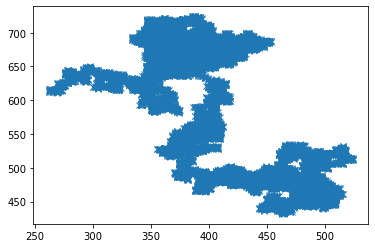

In [282]:
ys_path, xs_path =np.array(p).T
plt.plot(xs_path, ys_path, '-x')